In [4]:
from scipy import stats
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Анализ эффективности удержания

В этом задании предлагается проанализировать данные одной из американских телекоммуникационных компаний о пользователях, которые потенциально могут уйти.

Измерены следующие признаки:

- state — штат США
- account_length — длительность использования аккаунта
- area_code — деление пользователей на псевдорегионы, использующееся в телекоме
- intl_plan — подключена ли у пользователя услуга международного общения
- vmail_plan — подключена ли у пользователя услуга голосовых сообщений
- vmail_message — количество голосых сообщений, который пользователь отправил / принял
- day_calls — сколько пользователь совершил дневных звонков
- day_mins — сколько пользователь проговорил минут в течение дня
- day_charge — сколько пользователь заплатил за свою дневную активность
- eve_calls, eve_mins, eve_charge — аналогичные метрики относительно вечерней активности
- night_calls, night_mins, night_charge — аналогичные метрики относительно ночной активности
- intl_calls, intl_mins, intl_charge — аналогичные метрики относительно международного общения
- custserv_calls — сколько раз пользователь позвонил в службу поддержки
- treatment — номер стратегии, которая применялись для удержания абонентов (0, 2 = два разных типа воздействия, 1 = контрольная группа)
- mes_estim — оценка интенсивности пользования интернет мессенджерами
- churn — результат оттока: перестал ли абонент пользоваться услугами оператора

In [5]:
churn = pd.read_csv('churn_analysis.csv')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
Unnamed: 0        3333 non-null int64
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
intl_plan         3333 non-null object
vmail_plan        3333 non-null object
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
treatment         3333 non-null int64
mes_estim         3333 non-null float64
churn             3333 non-null obje

In [6]:
churn.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [7]:
churn.tail()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
3328,3328,AZ,192,415,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,2,0.59,False.
3329,3329,WV,68,415,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,2,0.32,False.
3330,3330,RI,28,510,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,1,0.47,False.
3331,3331,CT,184,510,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,2,0.32,False.
3332,3332,TN,74,415,no,yes,25,234.4,113,39.85,...,241.4,77,10.86,13.7,4,3.70,0,0,0.45,False.


In [8]:
churn.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
churn = churn.replace('False.','False').replace('True.','True')

In [10]:
churn.head()

,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False


Давайте рассмотрим всех пользователей из контрольной группы (treatment = 1). Для таких пользователей мы хотим проверить гипотезу о том, что штат абонента не влияет на то, перестанет ли абонент пользоваться услугами оператора.

Для этого мы воспользуемся критерием хи-квадрат. Постройте таблицы сопряженности между каждой из всех 1275 возможных неупорядоченных пар штатов и значением признака churn. Для каждой такой таблицы 2x2 применить критерий хи-квадрат можно с помощью функции

scipy.stats.chi2_contingency(subtable, correction=False)

In [11]:
from itertools import combinations

In [12]:
# pd.crosstab(churn[churn.treatment == 1]['churn'], churn[churn.treatment == 1]['state'])

In [13]:
churn_states = pd.pivot_table(churn[churn.treatment == 1],
                              index='state',
                              columns='churn',
                              aggfunc='size',
                              fill_value=0)
churn_states.head()

churn,False,True
state,,
AK,19,1
AL,25,5
AR,11,5
AZ,17,2
CA,10,5


In [14]:
pvals1_chi2 = []
pvals2_chi2 = []
pvals_fisher = []

for st1, st2 in combinations(churn_states.index, 2):
    pval1 = stats.chi2_contingency(churn_states.loc[[st1, st2], :], correction=False)[1]
    pvals1_chi2.append(pval1)
    pval2 = stats.chi2_contingency(churn_states.loc[[st1, st2], :], correction=True)[1]
    pvals2_chi2.append(pval2)
    pval3 = stats.fisher_exact(churn_states.loc[[st1, st2], :])[1]
    pvals_fisher.append(pval3)       

In [15]:
print(np.mean(pvals1_chi2))
print(np.sum(np.array(pvals1_chi2) < 0.05))

0.5018273798739158
34


In [16]:
print(np.mean(pvals2_chi2))
print(np.sum(np.array(pvals2_chi2) < 0.05))

0.6640566382051047
0


In [17]:
print(np.mean(pvals_fisher))
print(np.sum(np.array(pvals_fisher) < 0.05))

0.6483383060020681
10


Давайте попробуем применить полученные знания о разных видах корреляции и ее применимости на практике.

Рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Пирсона между этими признаками на всех данных, ее значимость.

In [18]:
print('Pearson correlation: %.4f' % stats.pearsonr(churn.day_calls, churn.mes_estim)[0])
print('P-value: %.4f' % stats.pearsonr(churn.day_calls, churn.mes_estim)[1])

Pearson correlation: -0.0518
P-value: 0.0028


Еще раз рассмотрим пару признаков day_calls и mes_estim. Посчитайте корреляцию Спирмена между этими признаками на всех данных, ее значимость.

In [19]:
print('Spearman correlation: %.4f' % stats.spearmanr(churn.day_calls, churn.mes_estim)[0])
print('P-value: %.4f' % stats.spearmanr(churn.day_calls, churn.mes_estim)[1])

Spearman correlation: 0.0433
P-value: 0.0123


((array([-3.5297919 , -3.28786833, -3.15418238, ...,  3.15418238,
          3.28786833,  3.5297919 ]),
  array([0.05, 0.05, 0.05, ..., 0.89, 0.91, 0.96])),
 (0.13861708020693375, 0.4842364236423642, 0.9996050483985336))

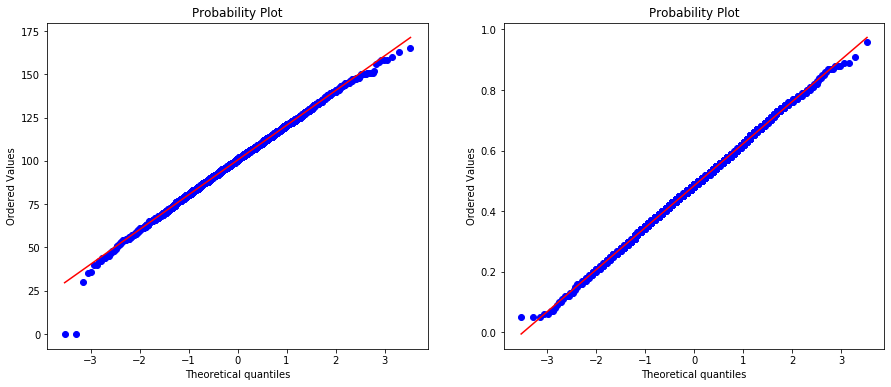

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(121)
sc.stats.probplot(churn.day_calls, dist="norm", plot=plt)
plt.subplot(122)
sc.stats.probplot(churn.mes_estim, dist="norm", plot=plt)

Text(0, 0.5, 'mes_estim')

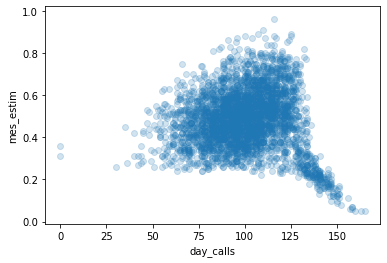

In [21]:
plt.scatter(churn.day_calls, churn.mes_estim, alpha=0.2)
plt.xlabel('day_calls')
plt.ylabel('mes_estim')

Посчитайте значение коэффицента корреляции Крамера между двумя признаками: штатом (state) и оттоком пользователей (churn) для всех пользователей, которые находились в контрольной группе (treatment=1). Что можно сказать о достигаемом уровне значимости при проверке гипотезы о равенство нулю этого коэффициента?

In [22]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [23]:
print('V Cramer stat value: %.4f' % cramers_stat(churn_states.values))

V Cramer stat value: 0.2004


In [24]:
print('p-value: %.4f' % stats.chi2_contingency(churn_states.values)[1])

p-value: 0.7098


Вы прослушали большой курс и к текущему моменту обладете достаточными знаниями, чтобы попытаться самостоятельно выбрать нужный метод / инструмент / статистический критерий и сделать правильное заключение.

В этой части задания вам нужно будет самостоятельно решить, с помощью каких методов можно провести анализ эффективности удержания (churn) с помощью раличных методов (treatment = 0, treatment = 2) относительно контрольной группы пользователей (treatment = 1).

Что можно сказать об этих двух методах (treatment = 0, treatment = 2)? Одинаковы ли они с точки зрения эффективности? Каким бы методом вы бы посоветовали воспользоваться компании?

Не забудьте про поправку на множественную проверку! И не пользуйтесь односторонними альтернативами, поскольку вы не знаете, к каким действительно последствиям приводят тестируемые методы (treatment = 0, treatment = 2) !

In [25]:
churn_treat_states = pd.pivot_table(churn,
                                    index='state',
                                    columns=['treatment', 'churn'],
                                    aggfunc='size',
                                    fill_value=0)
churn_treat_states.head()

treatment     0          1          2     
churn     False True False True False True
state                                     
AK           15    2    19    1    15    0
AL           22    1    25    5    25    2
AR           14    3    11    5    19    3
AZ           26    0    17    2    17    2
CA           10    3    10    5     5    1

In [26]:
from statsmodels.stats.proportion import proportion_confint

In [27]:
for i in range(3):
    count = churn_treat_states.loc[:, i]['True'].sum()
    nobs = churn_treat_states.loc[:, i]['True'].sum() + churn_treat_states.loc[:, i]['False'].sum()
    print('Treatment #%d' % i)
    print('Prop. of churn = 1: %.4f' % (count / nobs))
    print('Wilson interval for prop.: [%.4f, %.4f]' % (proportion_confint(count, nobs, method='wilson')), end='\n\n')    

Treatment #0
Prop. of churn = 1: 0.1456
Wilson interval for prop.: [0.1263, 0.1674]

Treatment #1
Prop. of churn = 1: 0.1641
Wilson interval for prop.: [0.1433, 0.1872]

Treatment #2
Prop. of churn = 1: 0.1251
Wilson interval for prop.: [0.1069, 0.1459]



In [34]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    l1 = sample1['False'].sum() + sample1['True'].sum()
    l2 = sample2['False'].sum() + sample2['True'].sum()
    p1 = sample1['True'].sum() / l1
    p2 = sample2['True'].sum() / l2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ l1 + p2 * (1 - p2)/ l2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ l1 + p2 * (1 - p2)/ l2)
    
    return (left_boundary, right_boundary)

In [29]:
def proportions_diff_z_stat_ind(sample1, sample2):
    l1 = sample1['False'].sum() + sample1['True'].sum()
    l2 = sample2['False'].sum() + sample2['True'].sum()
    p1 = sample1['True'].sum() / l1
    p2 = sample2['True'].sum() / l2
    P = (p1*l1 + p2*l2) / (l1 + l2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / l1 + 1. / l2))

In [30]:
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [52]:
p_vals = []
for treat1, treat2 in combinations(range(3), 2):
    print('Treatments #%d and %d: ' % (treat1, treat2), end='')
    confint_diff = proportions_confint_diff_ind(churn_treat_states.loc[:, treat1], churn_treat_states.loc[:, treat2])
    print('[%.4f, %.4f], ' % confint_diff, end='')
    p_val = proportions_diff_z_test(proportions_diff_z_stat_ind(churn_treat_states.loc[:, treat1], churn_treat_states.loc[:, treat2]))
    print('p-value: %.4f' % p_val)
    p_vals.append(p_val)

Treatments #0 and 1: [-0.0485, 0.0116], p-value: 0.2283
Treatments #0 and 2: [-0.0078, 0.0489], p-value: 0.1564
Treatments #1 and 2: [0.0096, 0.0683], p-value: 0.0093


In [53]:
from statsmodels.sandbox.stats.multicomp import multipletests 

In [54]:
p_corr = multipletests(p_vals, alpha = 0.05, method = 'fdr_bh') 
p_corr[1]

array([0.22833116, 0.22833116, 0.02804425])